In [ ]:
import pandas as pd


df_prov = pd.read_csv("data/turismo_receptor_provincia.csv", sep=";", encoding="utf-8")
df_geo = pd.read_csv("data/spain_locations.csv")
df_prov.head()


,AÑO,MES,PROVINCIA_DESTINO,CONTINENTE_ORIGEN,PAIS_ORIGEN,TURISTAS,PERNOCTACIONES,ESTANCIA_MEDIA
0,2019,7,A Coruña,América,Argentina,"491,0","4075,0","8,3"
1,2019,7,A Coruña,América,Brasil,"717,0","3800,0","5,3"
2,2019,7,A Coruña,América,Canadá,"229,0","1511,0","6,6"
3,2019,7,A Coruña,América,Chile,"70,0","504,0","7,2"
4,2019,7,A Coruña,América,Colombia,"226,0","1740,0","7,7"


In [ ]:


#Diccionario de posiciones ajustadas manualmente para un hex map
positions = {
    "La Coruña": (0, 0), "Lugo": (0, 1), "Asturias": (0, 2), "León": (0, 3), "Cantabria": (0, 4),"Vizcaya": (0, 5),

    "Pontevedra": (1, 0.5),"Orense": (1, 1.5),"Zamora": (1, 2.5), "Palencia": (1, 3.5), "Álava": (1, 4.5), "Guipúzcoa": (1, 5.5),
    "Navarra": (1, 6.5), "Lérida": (1, 7.5),"Barcelona": (1, 8.5),"Gerona": (1, 9.5),
    
    "Valladolid": (2, 3), "Burgos": (2, 4), "Soria": (2, 5), "Zaragoza": (2, 6),"Huesca": (2, 7), "Tarragona": (2, 8),
    
    "Salamanca": (3, 2.5),"Segovia": (3, 3.5), "Guadalajara": (3, 4.5),"La Rioja": (3, 5.5),"Teruel": (3, 6.5),

    "Cáceres": (4, 2),"Ávila": (4, 3),"Madrid": (4, 4),"Cuenca": (4, 5), "Castellón": (4, 6),  "Islas Baleares": (4, 9),

    "Huelva": (5, 1.5), "Badajoz": (5, 2.5),"Toledo": (5, 3.5), "Ciudad Real": (5, 4.5),"Albacete": (5, 5.5), "Valencia": (5, 6.5),

    "Sevilla": (6, 2), "Córdoba": (6, 3), "Jaén": (6, 4), "Murcia": (6, 5), "Alicante": (6, 6),

    "Cádiz": (7, 2.5),"Málaga": (7, 3.5),"Granada": (7, 4.5),  "Almería": (7, 5.5), 


    "Santa Cruz de Tenerife": (9, -1.5),"Las Palmas": (9, -0.5),    "Ceuta": (9, 2.5),"Melilla": (9, 4.5)

    
}


# Asignar las posiciones al DataFrame
df_geo["row"] = df_geo["name_es"].map(lambda x: positions[x][0])
df_geo["column"] = df_geo["name_es"].map(lambda x: positions[x][1])



# Convertir los valores de columna a cadena y cambiar los puntos por comas
df_geo["column"] = df_geo["column"].astype(str).str.replace(".", ",")
df_geo["row"] = df_geo["row"].astype(str).str.replace(".", ",")



# Mostrar el DataFrame
print(df_geo)
# Asignar filas y columnas

# Exportar a CSV para Tableau
df_geo.to_csv("data/provincias_hex_map.csv", index=False)

                   name_es latitude   longitude row column
0                    Ceuta  35,8803      -5,341   9    2,5
1                  Melilla  35,2934    -2,94015   9    4,5
2                  Navarra  42,7493    -1,63845   1    6,5
3                Guipúzcoa  43,1495     -2,2243   1    5,5
4                   Huesca  42,1863  -0,0128081   2    7,0
5                   Lérida  42,0143     1,11518   1    7,5
6                   Gerona  42,0844     2,79123   1    9,5
7                  Badajoz  38,5731    -6,26724   5    2,5
8                    Cádiz  36,4828    -5,82488   7    2,5
9                   Orense  42,1609    -7,59234   1    1,5
10                 Cáceres  39,7279    -6,08204   4    2,0
11               Salamanca  40,8324     -5,9926   3    2,5
12                  Zamora  41,6837    -5,84292   1    2,5
13              Pontevedra  42,5257     -8,4998   1    0,5
14                  Huelva  37,6217    -6,90248   5    1,5
15               Barcelona  41,6575     2,00777   1    8

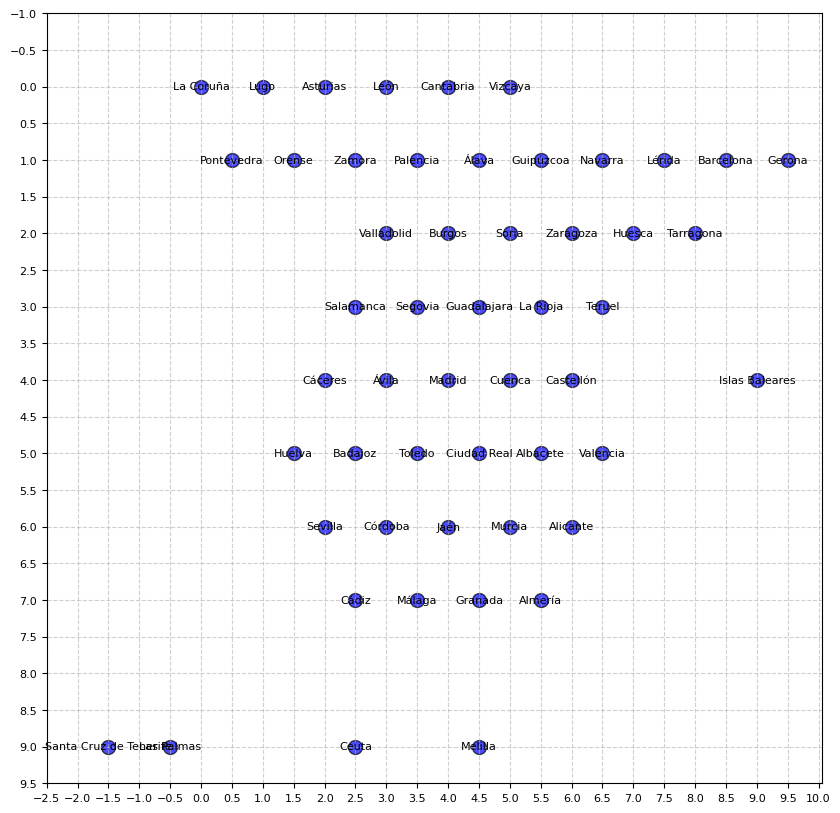

In [3]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(10, 10))

# Graficar puntos
plt.scatter(df_geo['column'], df_geo['row'], c='blue', alpha=0.7, edgecolors='k', s=100)

# Etiquetas de las provincias
for i, name in enumerate(df_geo['name_es']):
    plt.text(df_geo['column'].iloc[i], df_geo['row'].iloc[i], name, fontsize=8, ha='center', va='center')

# Configurar ejes
plt.gca().invert_yaxis()  # Invertir el eje Y para representar mejor el estilo de un hex map
plt.xticks(
    ticks=[round(x, 1) for x in 
           list(df_geo['column'].min() - 1 + i * 0.5 for i in range(int((df_geo['column'].max() - df_geo['column'].min() + 2) / 0.5)))],
    fontsize=8
)
plt.yticks(
    ticks=[round(y, 1) for y in 
           list(df_geo['row'].min() - 1 + i * 0.5 for i in range(int((df_geo['row'].max() - df_geo['row'].min() + 2) / 0.5)))],
    fontsize=8
)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()


In [ ]:
df_prov['PROVINCIA_DESTINO'].unique() #el de los datos.

#cambiar los nombres de las provincias para que coincidan con los de la tabla de posiciones
df_prov['PROVINCIA_DESTINO'] = df_prov['PROVINCIA_DESTINO'].map({
    'A Coruña': 'La Coruña', 'Lugo': 'Lugo', 'Asturias': 'Asturias', 'León': 'León', 'Cantabria': 'Cantabria', 'Bizkaia': 'Vizcaya',
    'Pontevedra': 'Pontevedra', 'Ourense': 'Orense', 'Zamora': 'Zamora', 'Palencia': 'Palencia', 'Araba/Álava': 'Álava', 'Gipuzkoa': 'Guipúzcoa',
    'Navarra': 'Navarra', 'Lleida': 'Lérida', 'Barcelona': 'Barcelona', 'Girona': 'Gerona', 'Valladolid': 'Valladolid', 'Burgos': 'Burgos',
    'Soria': 'Soria', 'Zaragoza': 'Zaragoza', 'Huesca': 'Huesca', 'Tarragona': 'Tarragona', 'Salamanca': 'Salamanca', 'Segovia': 'Segovia',
    'Guadalajara':'Guadalajara','Albacete': 'Albacete', 'La Rioja': 'La Rioja', 'Teruel': 'Teruel', 'Cáceres': 'Cáceres', 'Ávila': 'Ávila',
    'Alicante/Alacant': 'Alicante', 'Castellón/Castelló': 'Castellón', 'Illes Balears': 'Islas Baleares', 'Huelva': 'Huelva', 'Badajoz': 'Badajoz',
    'Toledo': 'Toledo', 'Total Nacional': 'Total', 'Ceuta':'Ceuta', 'Melilla':'Melilla', 'Ciudad Real': 'Ciudad Real', 'Cuenca': 'Cuenca', 
    'Huelva': 'Huelva', 'Jaén': 'Jaén', 'Cádiz': 'Cádiz', 'Málaga': 'Málaga', 'Sevilla': 'Sevilla', 'Córdoba': 'Córdoba', 'Granada': 'Granada',
    'Almería':'Almería', 'Santa Cruz de Tenerife': 'Santa Cruz de Tenerife', 'Las Palmas': 'Las Palmas','Murcia': 'Murcia', 'Madrid': 'Madrid','Valencia/València': 'Valencia'})

abbreviations = {
    "La Coruña": "C", "Lugo": "LU", "Asturias": "AS", "León": "LE", "Cantabria": "S", "Vizcaya": "BI",
    "Pontevedra": "PO", "Orense": "OR", "Zamora": "ZA", "Palencia": "P", "Álava": "VI", "Guipúzcoa": "SS",
    "Navarra": "NA", "Lérida": "L", "Barcelona": "B", "Gerona": "GI",
    "Valladolid": "VA", "Burgos": "BU", "Soria": "SO", "Zaragoza": "Z", "Huesca": "HU", "Tarragona": "T",
    "Salamanca": "SA", "Segovia": "SG", "Guadalajara": "GU", "La Rioja": "LO", "Teruel": "TE",
    "Cáceres": "CC", "Ávila": "AV", "Madrid": "M", "Cuenca": "CU", "Castellón": "CS", "Islas Baleares": "IB",
    "Huelva": "H", "Badajoz": "BA", "Toledo": "TO", "Ciudad Real": "CR", "Albacete": "AB", "Valencia": "V",
    "Sevilla": "SE", "Córdoba": "CO", "Jaén": "J", "Murcia": "MU", "Alicante": "A",
    "Cádiz": "CA", "Málaga": "MA", "Granada": "GR", "Almería": "AL",
    "Santa Cruz de Tenerife": "TF", "Las Palmas": "GC", "Ceuta": "CE", "Melilla": "ML"
}

df_prov['ABR'] = df_prov['PROVINCIA_DESTINO'].map(abbreviations)


In [38]:
len(df_geo['name_es'].unique())

df_prov['PROVINCIA_DESTINO'].unique()

array(['La Coruña', 'Albacete', 'Alicante', 'Almería', 'Álava',
       'Asturias', 'Badajoz', 'Barcelona', 'Vizcaya', 'Burgos',
       'Cantabria', 'Castellón', 'Ceuta', 'Ciudad Real', 'Cuenca',
       'Cáceres', 'Cádiz', 'Córdoba', 'Guipúzcoa', 'Gerona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Islas Baleares', 'Jaén',
       'La Rioja', 'Las Palmas', 'León', 'Lérida', 'Lugo', 'Madrid',
       'Melilla', 'Murcia', 'Málaga', 'Navarra', 'Orense', 'Palencia',
       'Pontevedra', 'Salamanca', 'Santa Cruz de Tenerife', 'Segovia',
       'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Total',
       'Valencia', 'Valladolid', 'Zamora', 'Zaragoza', 'Ávila'],
      dtype=object)

In [39]:
df_prov['ABR'].unique()

array(['C', 'AB', 'A', 'AL', 'VI', 'AS', 'BA', 'B', 'BI', 'BU', 'S', 'CS',
       'CE', 'CR', 'CU', 'CC', 'CA', 'CO', 'SS', 'GI', 'GR', 'GU', 'H',
       'HU', 'IB', 'J', 'LO', 'GC', 'LE', 'L', 'LU', 'M', 'ML', 'MU',
       'MA', 'NA', 'OR', 'P', 'PO', 'SA', 'TF', 'SG', 'SE', 'SO', 'T',
       'TE', 'TO', nan, 'V', 'VA', 'ZA', 'Z', 'AV'], dtype=object)

In [ ]:
#df_prov.to_csv("data/turismo_provincias.csv", index=False)